# Generalized Rotating Wave Aproximation (GRWA)
Before dwelling around the ideas of generalized rotating wave aproximation one must first think of what is rotating wave aproximation that is to be generalized with respect to what (the coupling strength)?
## **The Rotating Wave Aproximation**
The problem is simple to which we apply the so called *RWA* (Rotating Wave Aproximation). It is that of a two level system  (described by its spinor algebra) and a bosonic field that interacts with it. So, essentially we have a Hamiltonian with free terms and an interacting term characterized by the coupling strength &lambda;. The Hamiltonian is given by:
$$
\hat{H}_{JC} = \hbar \omega_0 \hat{a}^\dagger \hat{a} + \frac{\hbar \Omega}{2} \hat{\sigma}_x + \hbar \lambda \hat{\sigma}_z (\hat{a} + \hat{a}^\dagger)
$$
We would encourage the reader to see reference 1, as it has the notation that we are following. Once on paper you can convince yourself of the representation of the Hamiltonian we can render it computationally. As we do next
For our purpose, we have to modify the Hamiltonian. Dividing by &Omega; , where &Omega; and &omega;<sub>0</sub> are almost equal, and &hbar;= 1, the Hamiltonian becomes:

$$
\hat H = \hat a^\dagger \hat a + \frac{1}{2} \sigma_x + \frac{\lambda}{\omega_0} \hat{\sigma}_z \left( \hat a^\dagger + \hat a \right)
$$

Now a solution to this exact Hamiltonian is displayed as the numerical solution. Whereas the RWA solution is given by the Hamiltonian:

$$
\hat{H}_{RWA} = \hat a^\dagger  \hat a + \frac{1}{2} \sigma_x + \frac{\lambda}{\omega_0} \left( \hat{\sigma}_- \hat a^\dagger + \hat{\sigma}_+ \hat a \right)
$$

### The Basis used
We have employed the &pm; z, N basis to describing the Hamiltonian above. But in the code I have used &pm; x, N basis. The choice is because the free hamiltonian (i.e. when &lambda; = 0) is diagonal in the later basis. For that one must understand that a change of basis is neccessary. Lucky for us it is simple, as &sigma;<sub>x</sub> and &sigma;<sub>z</sub> get interchanged so we simply switch their places in the code. 

In [ ]:
#start with importing the relevant packages. qutip is the useful package we shall employ as it treats tensor products very nicely
import qutip as qt #  make sure qutip is installed properly on your system and your python IDE can access it
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.linalg import eigh

# Define parameters of the Hamiltonian 
n= int(input("What are the number of photons?"))
hbar = 1.0  # Planck's constant (set to 1 for simplicity)
omega0 = 1  # Frequency of the field mode
Omega = 1 # Transition frequency of the two-level atom
lambda_coupling = 0  # Coupling strength to be used as a variable for plot so stored in an array later

# The standard way of writing tensors in qutip. Note that the order is bosonic operator (tensor product) TLS operators

a = qt.tensor(qt.destroy(n),qt.qeye(2))

sigma_x = qt.tensor(qt.qeye(n),qt.sigmax())
sigma_z = qt.tensor(qt.qeye(n),qt.sigmaz())


sigma_plus = qt.tensor(qt.qeye(n),qt.sigmap())
sigma_minus = qt.tensor(qt.qeye(n),qt.sigmam())


# Range of lambda_coupling values
lambda_coupling_values = np.arange(0, 1.5, 0.01)
#empty lists for later storing the eigen values of their respective Hamiltonians
eigenvalues_list_RWA = []
eigenvalues_list_full = []


# Loop over lambda_coupling values RWA
for lambda_coupling in lambda_coupling_values:
    H_RWA = a.dag() * a - 0.5 * sigma_z + (lambda_coupling / omega0) * (a.dag() * sigma_plus + a * sigma_minus)
    eigenvalues_RWA = H_RWA.eigenenergies()
    eigenvalues_list_RWA.append(eigenvalues_RWA)

# Convert list to numpy array for easier plotting
eigenvalues_array_RWA = np.array(eigenvalues_list_RWA)
colors_r = cm.viridis(np.linspace(0, 1, eigenvalues_array_RWA.shape[1]))

# Loop over lambda_coupling values full
for lambda_coupling in lambda_coupling_values:
    H_full = a.dag() * a - 0.5 * sigma_x + (lambda_coupling / omega0) * (a.dag() + a)*sigma_z
    eigenvalues_full = H_full.eigenenergies()
    eigenvalues_list_full.append(eigenvalues_full)

# Convert list to numpy array for easier plotting
eigenvalues_array_full = np.array(eigenvalues_list_full)
colors_f = cm.viridis(np.linspace(0, 1, eigenvalues_array_full.shape[1]))

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_RWA.shape[1]):
    plt.plot(lambda_coupling_values, eigenvalues_array_RWA[:, i],color=colors_r[i])
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues in RWA vs Lambda Coupling')
plt.legend()
plt.show()

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_full.shape[1]):
    plt.plot(lambda_coupling_values, eigenvalues_array_full[:, i],color=colors_f[i])
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues numerical vs Lambda Coupling')
plt.legend()
plt.show()

The question remains, how can one erradicate this dependence on lambda. As one sees by increasing the lambda the approximation worsens. As it is (almost) perturbative. What can one do to theoratically model it better? Well we are in luck, again. The reference we are following follows a simple yet powerful change of basis that shifts the &lambda; focus to &Omega;

We shall focus on the computational aspect, which is simple enough as the only task at hand is to employ a change of basis. By hand working is encouraged as this is a simple yet rich problem.

## Adiabatic Approximation












What are the number of photons? 14
what is Omega interms of omega0s? 1


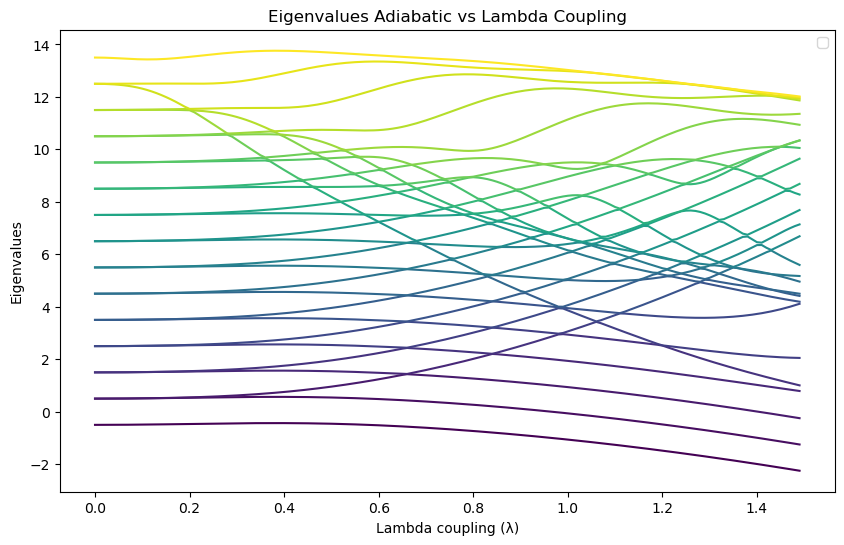

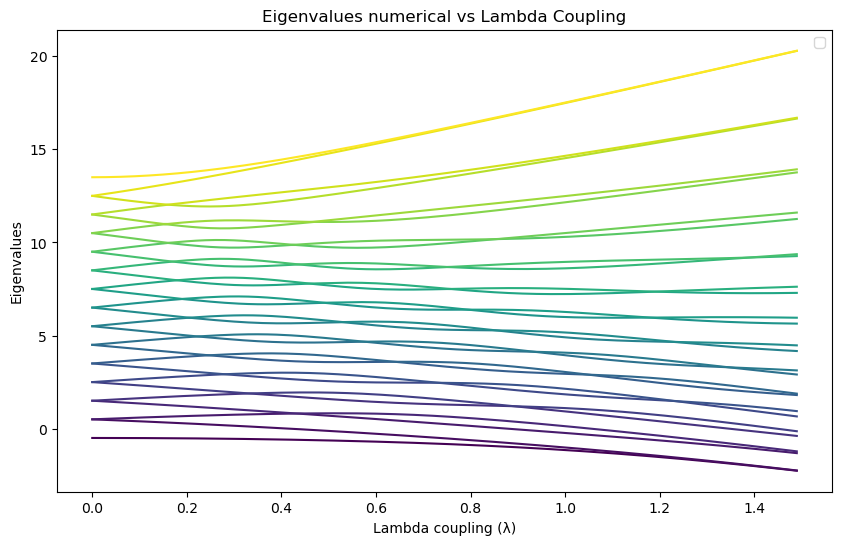

In [13]:
# import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define parameters
n= int(input("What are the number of photons?"))
hbar = 1.0  # Planck's constant (set to 1 for simplicity)
omega0 = 1  # Frequency of the field mode
Omega = float(input("what is Omega interms of omega0s?")) # Transition frequency of the two-level atom for adiabatic approxiamtion is 0

#Relevant Operators
a = qt.tensor(qt.destroy(n),qt.qeye(2))

sigma_x = qt.tensor(qt.qeye(n),qt.sigmax())
sigma_z = qt.tensor(qt.qeye(n),qt.sigmaz())

# Range of lambda_coupling values
lambda_coupling_values = np.arange(0, 1.5, 0.01)
#empty lists for later storing the eigen values of their respective Hamiltonians
eigenvalues_list_adiabatic = []

# Loop over lambda_coupling values adiabatic
for lambda_coupling in lambda_coupling_values:
    H = omega0*a.dag()*a  + 0.5*Omega*sigma_x + lambda_coupling* sigma_z*(a.dag()+a)
    transform = ((-lambda_coupling / omega0) * (a.dag()-a)).expm()
    H_a = transform.dag() *  H * transform
    m = H_a.shape[0]
    # Remove undesired entries by iterating through the matrix
    # Create a new matrix diagonal
    modified_ad = np.diag(np.diag(H_a))
    # Iterate over the matrix
    for i in range(m-1):
        if i % 2 == 0 :
            modified_ad[i, i+1] = H_a[i, i+1]
            modified_ad[i+1, i] = H_a[i+1, i]
    # Convert the modified numpy matrix back to a Qobj
    modified_qobj = qt.Qobj(modified_ad)
    eigen_values = modified_qobj.eigenenergies()
    eigenvalues_list_adiabatic.append(eigen_values)
eigenvalues_array_adiabatic = np.array(eigenvalues_list_adiabatic)
colors_f = cm.viridis(np.linspace(0, 1, eigenvalues_array_adiabatic.shape[1]))

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_adiabatic.shape[1]):
    plt.plot(lambda_coupling_values, eigenvalues_array_adiabatic[:, i],color=colors_f[i])
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues Adiabatic vs Lambda Coupling')
plt.legend()
plt.show()

eigenvalues_list_full = []
# Loop over lambda_coupling values full
for lambda_coupling in lambda_coupling_values:
    H_full = a.dag() * a + (lambda_coupling / omega0) * (a.dag() + a)*sigma_z + + 0.5*Omega*sigma_x
    eigenvalues_full = H_full.eigenenergies()
    eigenvalues_list_full.append(eigenvalues_full)

# Convert list to numpy array for easier plotting
eigenvalues_array_full = np.array(eigenvalues_list_full)
colors_f = cm.viridis(np.linspace(0, 1, eigenvalues_array_full.shape[1]))

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_full.shape[1]):
    plt.plot(lambda_coupling_values, eigenvalues_array_full[:, i],color=colors_f[i])
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues numerical vs Lambda Coupling')
plt.legend()
plt.show()

# GRWA 
The idea is simple enough (not the analytical calculations). The GRWA aims to have a change of basis that assits to hide the lambda dependence wherein the off-diagonals are mostly Omega dependent. This works equally well in not only high lambda but low Omega regimes. The fitting is precise.

What are the number of photons? 20
What is omega0 interms of Omega? 0.75


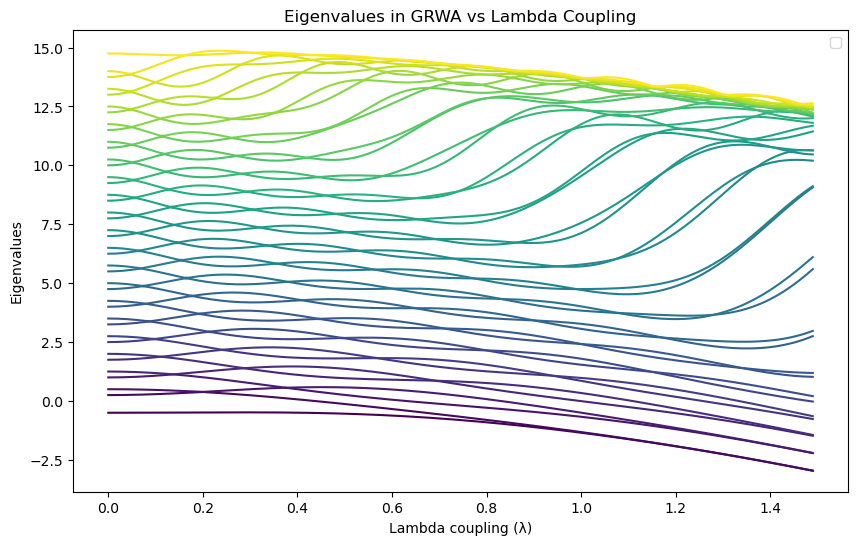

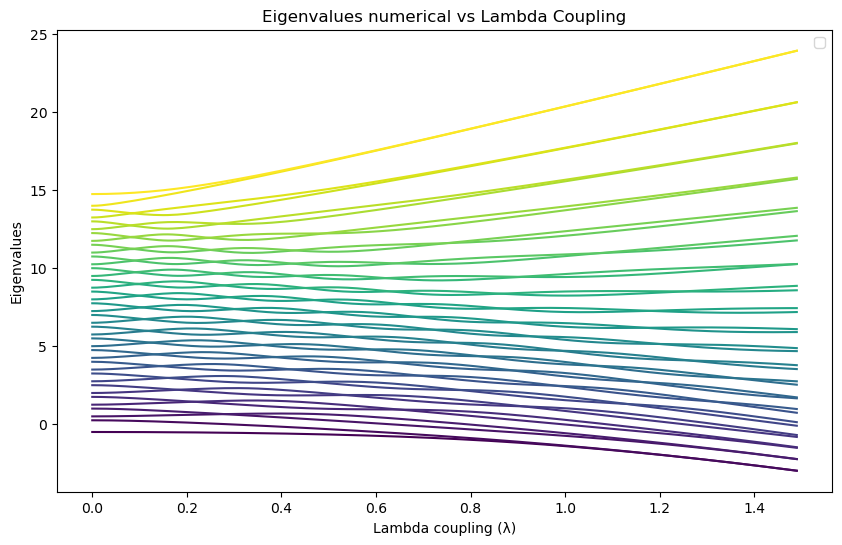

In [8]:
import qutip as qt 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define parameters
n= int(input("What are the number of photons?"))
hbar = 1.0  # Planck's constant (set to 1 for simplicity)
omega0 = float(input("What is omega0 interms of Omega?"))  # Frequency of the field mode
Omega = 1.0  # Transition frequency of the two-level atom

#Relevant Operators
a = qt.tensor(qt.destroy(n),qt.qeye(2))

sigma_x = qt.tensor(qt.qeye(n),qt.sigmax())
sigma_z = qt.tensor(qt.qeye(n),qt.sigmaz())

exponent_ops1 = qt.tensor(qt.create(n),qt.sigmaz())
exponent_ops2 = qt.tensor(qt.destroy(n),qt.sigmaz())




# Range of lambda_coupling values
lambda_coupling_values = np.arange(0, 1.5, 0.01)
#empty lists for later storing the eigen values of their respective Hamiltonians
eigenvalues_list_GRWA = []
eigenvalues_list_full = []


# Loop over lambda_coupling values GRWA
for lambda_coupling in lambda_coupling_values:
    H_GRWA1 = ((omega0/Omega)* a.dag() * a - 0.5*sigma_x + (lambda_coupling/Omega)*(a.dag() + a)*sigma_z)
    transformp = (-1*lambda_coupling / omega0) * (exponent_ops1 - exponent_ops2)
    transform = transformp.expm()
    H_GRWA = transform.dag() * H_GRWA1 * transform
    H_GRWA = np.array(H_GRWA)
    n = H_GRWA.shape[0]
    # Remove undesired entries by iterating through the matrix
    # Create a new matrix filled with zeros
    modified_GRWA = np.diag(np.diag(H_GRWA))

    # Iterate over the matrix
    for i in range(n-1):
        if i%2 == 0:
            modified_GRWA[i, i+1] = H_GRWA[i, i+1]
            modified_GRWA[i+1, i] = H_GRWA[i+1, i]
    # Convert the modified numpy matrix back to a Qobj
    modified_qobj = qt.Qobj(modified_GRWA)

    eigenvalues_GRWA = modified_qobj.eigenenergies()
    eigenvalues_list_GRWA.append(eigenvalues_GRWA)

# Convert list to numpy array for easier plotting
eigenvalues_array_GRWA = np.array(eigenvalues_list_GRWA)
colors_r = cm.viridis(np.linspace(0, 1, eigenvalues_array_GRWA.shape[1]))

# Loop over lambda_coupling values full
for lambda_coupling in lambda_coupling_values:
    H_full = ((omega0/Omega)* a.dag() * a - 0.5*sigma_x + (lambda_coupling/Omega)*(a.dag() + a)*sigma_z)
    eigenvalues_full = H_full.eigenenergies()
    eigenvalues_list_full.append(eigenvalues_full)

# Convert list to numpy array for easier plotting
eigenvalues_array_full = np.array(eigenvalues_list_full)
colors_f = cm.viridis(np.linspace(0, 1, eigenvalues_array_full.shape[1]))

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_GRWA.shape[1]):
    plt.plot(lambda_coupling_values, eigenvalues_array_GRWA[:, i],color=colors_r[i])
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues in GRWA vs Lambda Coupling')
plt.legend()
plt.show()

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_full.shape[1]):
    plt.plot(lambda_coupling_values, eigenvalues_array_full[:, i],color=colors_f[i])
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues numerical vs Lambda Coupling')
plt.legend()
plt.show()

# Comparision Plot

What are the number of photons? 4
What is omega0 interms of Omega? 1


IndexError: index 8 is out of bounds for axis 1 with size 8

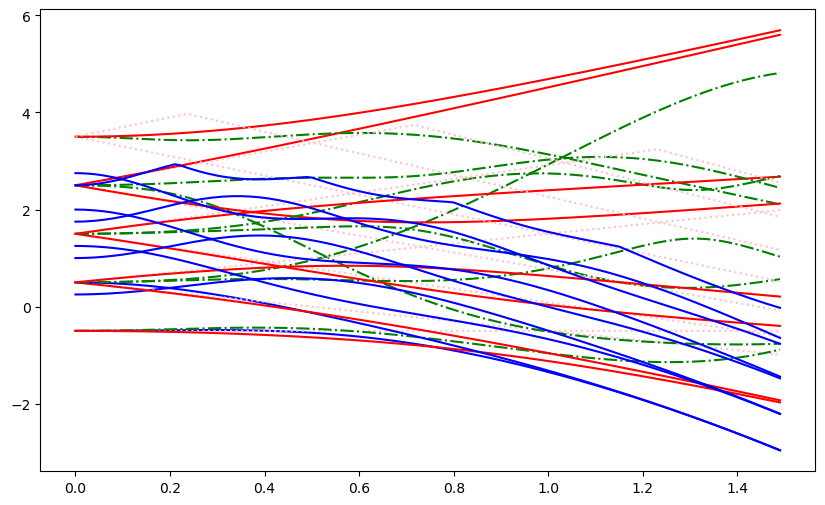

In [18]:
import qutip as qt 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define parameters
n= int(input("What are the number of photons?"))
hbar = 1.0  # Planck's constant (set to 1 for simplicity)
omega0 = float(input("What is omega0 interms of Omega?"))  # Frequency of the field mode
Omega = 1.0  # Transition frequency of the two-level atom

#Relevant Operators
a = qt.tensor(qt.destroy(n),qt.qeye(2))

sigma_x = qt.tensor(qt.qeye(n),qt.sigmax())
sigma_z = qt.tensor(qt.qeye(n),qt.sigmaz())

sigma_plus = qt.tensor(qt.qeye(n),qt.sigmap())
sigma_minus = qt.tensor(qt.qeye(n),qt.sigmam())

exponent_ops1 = qt.tensor(qt.create(n),qt.sigmaz())
exponent_ops2 = qt.tensor(qt.destroy(n),qt.sigmaz())




# Range of lambda_coupling values
lambda_coupling_values = np.arange(0, 1.5, 0.01)
#empty lists for later storing the eigen values of their respective Hamiltonians
eigen_values_list_RWA =[]
eigen_values_list_adiabatic =[]
eigen_values_list_GRWA = []
eigen_values_list_full = []

# Loop over lambda_coupling values RWA
for lambda_coupling in lambda_coupling_values:
    H_RWA = a.dag() * a - 0.5 * sigma_z + (lambda_coupling / omega0) * (a.dag() * sigma_plus + a * sigma_minus)
    eigenvalues_RWA = H_RWA.eigenenergies()
    eigen_values_list_RWA.append(eigenvalues_RWA)

# Convert list to numpy array for easier plotting
eigen_values_array_RWA = np.array(eigenvalues_list_RWA)


# Loop over lambda_coupling values full
for lambda_coupling in lambda_coupling_values:
    H_full = a.dag() * a - 0.5 * sigma_z + (lambda_coupling / omega0) * (a.dag() + a)*sigma_x
    eigen_values_full = H_full.eigenenergies()
    eigen_values_list_full.append(eigen_values_full)

# Convert list to numpy array for easier plotting
eigen_values_array_full = np.array(eigen_values_list_full)


# Loop over lambda_coupling values adiabatic
for lambda_coupling in lambda_coupling_values:
    H = omega0*a.dag()*a  + 0.5*Omega*sigma_x + lambda_coupling* sigma_z*(a.dag()+a)
    transform = ((-lambda_coupling / omega0) * (a.dag()-a)).expm()
    H_a = transform.dag() *  H * transform
    m = H_a.shape[0]
    # Remove undesired entries by iterating through the matrix
    # Create a new matrix diagonal
    modified_ad = np.diag(np.diag(H_a))
    # Iterate over the matrix
    for i in range(m-1):
        if i % 2 == 0 :
            modified_ad[i, i+1] = H_a[i, i+1]
            modified_ad[i+1, i] = H_a[i+1, i]
# Convert the modified numpy matrix back to a Qobj
    modified_qobj = qt.Qobj(modified_ad)
    eigen_values_adiabatic = modified_qobj.eigenenergies()
    eigen_values_list_adiabatic.append(eigen_values_adiabatic)
eigen_values_array_adiabatic = np.array(eigen_values_list_adiabatic)

# Loop over lambda_coupling values GRWA
for lambda_coupling in lambda_coupling_values:
    H_GRWA1 = ((omega0/Omega)* a.dag() * a - 0.5*sigma_x + (lambda_coupling/Omega)*(a.dag() + a)*sigma_z)
    transformp = (-1*lambda_coupling / omega0) * (exponent_ops1 - exponent_ops2)
    transform = transformp.expm()
    H_GRWA = transform.dag() * H_GRWA1 * transform
    H_GRWA = np.array(H_GRWA)
    n = H_GRWA.shape[0]
    # Remove undesired entries by iterating through the matrix
    # Create a new matrix filled with zeros
    modified_GRWA = np.diag(np.diag(H_GRWA))

    # Iterate over the matrix
    for i in range(n-1):
        if i%2 == 0:
            modified_GRWA[i, i+1] = H_GRWA[i, i+1]
            modified_GRWA[i+1, i] = H_GRWA[i+1, i]
    # Convert the modified numpy matrix back to a Qobj
    modified_qobj = qt.Qobj(modified_GRWA)

    eigen_values_GRWA = modified_qobj.eigenenergies()
    eigen_values_list_GRWA.append(eigen_values_GRWA)

# Convert list to numpy array for easier plotting
eigen_values_array_GRWA = np.array(eigenvalues_list_GRWA)

# Plot eigenvalues against lambda_coupling
plt.figure(figsize=(10, 6))
for i in range(eigenvalues_array_GRWA.shape[1]):
    plt.plot(lambda_coupling_values, eigen_values_array_GRWA[:, i],label='GRWA',linestyle='-',color='blue')
    plt.plot(lambda_coupling_values, eigen_values_array_RWA[:, i],label='RWA',linestyle=':',color='pink')
    plt.plot(lambda_coupling_values, eigen_values_array_adiabatic[:, i],label='Adiabatic',linestyle='-.',color='green')
    plt.plot(lambda_coupling_values, eigen_values_array_full[:, i],label='Numerical',linestyle='-',color='red')
    
plt.xlabel('Lambda coupling (λ)')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues vs Lambda Coupling')
plt.legend()
plt.show()
